# Practical Example of PCA with (modified) UCI wine dataset

This is modified from https://colab.research.google.com/drive/1MxaMoMhKWGGCH9MBdoHPMLk2cxGLGezr?authuser=1#scrollTo=mZwrkgrXhKT9

UCI Wine dataset consists of 178 data x 13 attributes with  3 class classification label.  

Observer the first 5 data.

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# confirm the data size
# 13 attributes + 1 class label
print(df_wine.shape)

(178, 14)


Splitting the data into 70% training and 30% test subsets.

In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

### Standardizing the data  

Data in each dimension is normalized to $N(0,1)$.  

**Important note**   
Data standardization for test data must be done with test data.  



In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # <- Watch this!
X_test_std = sc.transform(X_test) # <- Watch this!

### Eigenvalue decomposition of the covariance matrix (perform PCA)


This time, we use native Python code (np.linalg.elg function) for understanding.   
 (We will do the same thing with scikit-lean version later for practical usage)

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print(f' Eigenvalues = {eigen_vals}')

print(f'eigenvectors =\n {eigen_vecs}')


 Eigenvalues = [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]
eigenvectors =
 [[-1.37242175e-01  5.03034778e-01  1.37748734e-01  3.29610003e-03
   2.90625226e-01 -2.99096847e-01 -7.90529293e-02  3.68176414e-01
   3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01 -9.61503863e-02 -5.62646692e-01
  -8.95378697e-02 -6.27036396e-01  2.74002014e-01  1.25775752e-02
  -1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01 -6.77775667e-01  1.08977111e-01
   1.60834991e-01 -3.89128239e-04 -1.32328045e-01 -1.77578177e-01
  -3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01 -6.25040550e-01 -3.38187002e-02
  -5.15873402e-02  4.05836452e-02 -2.23999097e-01  4.40592110e-01
   2.43373853e-01 -1.30485780e-01 -4.189

### Cumulative contribution ratio
(cumulative explained variance)  

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

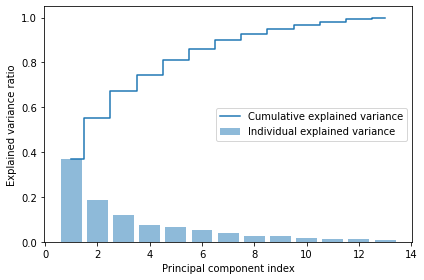

In [7]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/002.png', dpi=300)
plt.show()

### Calculating principal component scores
(Feature transform)  

$W = [w_1, w_2, \cdots, w_{13}]$, each $w_i$ is eigenvector.   
This time, we only forcus top two eigenvectors $W_2 = (w_1, w_2)$.

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
print(eigen_pairs[0])

(4.842745315655892, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651]))


In [10]:
print(eigen_pairs[1])

(2.416024587035226, array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
        0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
       -0.20716433, -0.24902536,  0.38022942]))


In [11]:
w_2 = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print(f'Matrix W_2 (each vector is eigenvector):\n  {w_2}')

Matrix W_2 (each vector is eigenvector):
  [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Calculating principal component score $Z = XW_2$  

That is, 13 dim data (178 x 13 dim) is compressed into orthogonal 2 dim data (178 x 2 dim). 


In [12]:
Z_train = X_train_std.dot(w_2)

In [13]:
# see first 10 scores
print(Z_train[:10])

[[ 2.38299011  0.45458499]
 [-1.96578183  1.65376939]
 [-2.53907598  1.02909066]
 [-1.43010776  0.6024011 ]
 [ 3.14147227  0.66214979]
 [ 0.50253552 -2.08907131]
 [ 0.04867722 -2.27536044]
 [ 2.47888989 -0.08603318]
 [ 2.01900259 -1.3538719 ]
 [ 0.75156583 -2.55367947]]


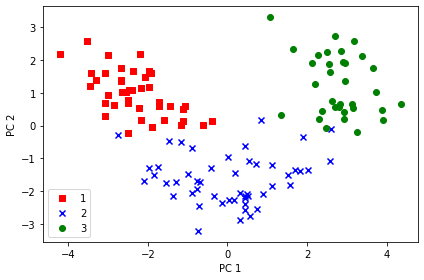

In [14]:
# visualize distribution
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(Z_train[y_train == l, 0], 
                Z_train[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

### Same process using scikit-learn  

(as same as the last week - super easy!)

In [15]:
from sklearn.decomposition import PCA
# PCA with all components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

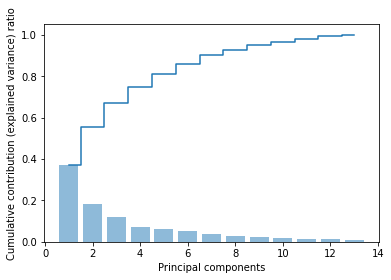

In [16]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative contribution (explained variance) ratio')
plt.xlabel('Principal components')

plt.show()

In [17]:
# This time, we perform PCA with only two PCs
# PCs are obtained with training data. (not test data)
pca = PCA(n_components=2)
Z_train = pca.fit_transform(X_train_std)
Z_test = pca.transform(X_test_std)

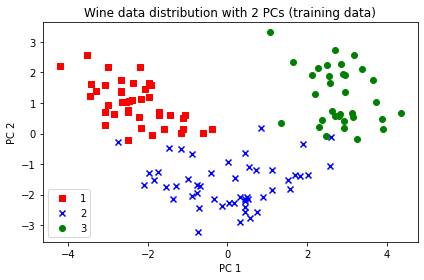

In [18]:
# visualize distribution (For training data)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(Z_train[y_train == l, 0], 
                Z_train[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Wine data distribution with 2 PCs (training data)')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/003train.png', dpi=300)
plt.show()

In [19]:
print(Z_train[0])

[2.38299011 0.45458499]


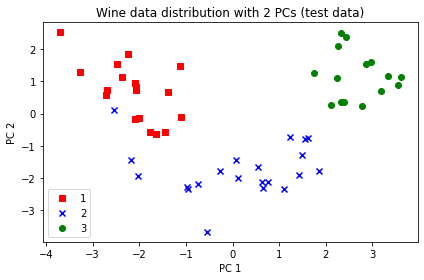

In [20]:
# visualize distribution (For testomg data)
# PCs are obtained with training data. (not test data)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(Z_test[y_test == l, 0], 
                Z_test[y_test == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Wine data distribution with 2 PCs (test data)')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/003test.png', dpi=300)
plt.show()

-----------------------------


# Classification of wine with logistic regression 

This example classifies wine in three categories using logistic regression with two principal component scores ($z_1, z_2$).

In [21]:
# preparation for visualizing results
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # Y is estimated classification class (0,1,2)
    Y = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Y = Y.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Y, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Training logistic regression classifier using the first two principal components $(z_1, z_2)$.

In [22]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
Z_train = pca.fit_transform(X_train_std)
Z_test = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(Z_train, y_train)

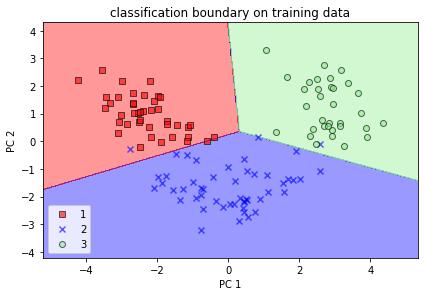

In [23]:
plot_decision_regions(Z_train, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/004train.png', dpi=300)
plt.title('classification boundary on training data')
plt.show()

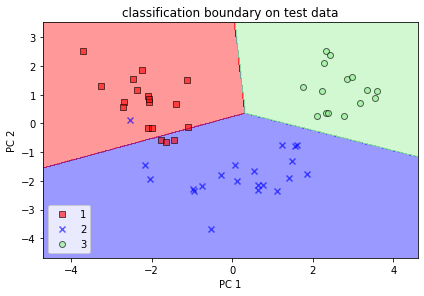

In [24]:
plot_decision_regions(Z_test, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/004test.png', dpi=300)
plt.title('classification boundary on test data')
plt.show()

In [25]:
# See the explained variance ratio (importance of each eigenvalue)
pca = PCA(n_components=None)
Z_train = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

------------------------------------



# Supervised data compression via linear discriminant analysis (LDA)

PCA does not use class label information.  (= unsupervised training)  

### LDA provides a more discriminative low-dimensional representation by using class labels, which in turn allows for better classification boundaries. 




### Firstly, we do this step-by-step. After, we use scikit-learn for practical usage.

In [26]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'mean vector of class {label}: { mean_vecs[label - 1]}\n')

mean vector of class 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

mean vector of class 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

mean vector of class 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



Compute the within-class scatter matrix $S_W$:

In [27]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print(f'Within-class scatter matrix S_W: {S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix S_W: 13x13


Here, covariance matrix since classes are not equally distributed:  

So better way is to normalize the $S_W$ with the number of data in each category $n_i$.  
This is, namely, equivalent to covariance matrix for class $i$, $\Sigma_i$.

In [28]:
print(f'Class label distribution: {np.bincount(y_train)[1:]}')

Class label distribution: [41 50 33]


In [29]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    # normalization of S_W ==> equivalent to sum of covariance matrix 
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print(f'SCALED within-class scatter matrix S_W: {S_W.shape[0]}x{S_W.shape[1]}')

SCALED within-class scatter matrix S_W: 13x13


Compute the beween-class scatter matrix $S_B$:  


In [30]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print(f'Between-class scatter matrix S_B: {S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix S_B: 13x13


## Selecting linear discriminants for the new feature subspace

Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [31]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

Sort eigenvectors in descending order of the eigenvalues:  

We can see only two (eventually) non-zero components.

In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.617808905994
172.76152218979388
5.752274263076048e-14
2.1571131987029847e-14
1.4176390454331418e-14
1.4176390454331418e-14
1.3113892875332047e-14
6.72899962596985e-15
2.7618238467023757e-15
2.7618238467023757e-15
1.6797278899409034e-15
1.2703744468254194e-15
0.0


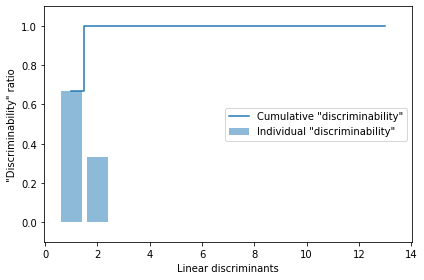

In [33]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/005.png', dpi=300)
plt.show()

In [34]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print(f'Matrix W (each indicates eigenvector):\n {w}')

Matrix W (each indicates eigenvector):
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


## Projecting examples onto the new feature space

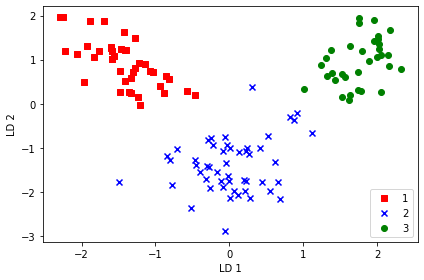

In [35]:
Z_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(Z_train_lda[y_train == l, 0],
                Z_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/006.png', dpi=300)
plt.show()

## LDA via scikit-learn

super easy. same result.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
Z_train_lda = lda.fit_transform(X_train_std, y_train)

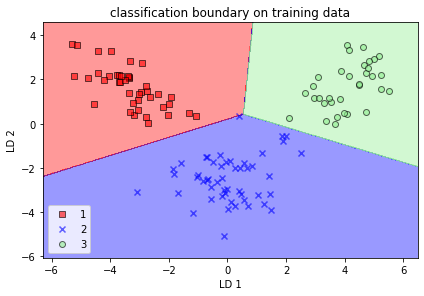

In [37]:
from sklearn.linear_model import LogisticRegression

# For training data
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(Z_train_lda, y_train)

plot_decision_regions(Z_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('classification boundary on training data')
# plt.savefig('images/007.png', dpi=300)
plt.show()

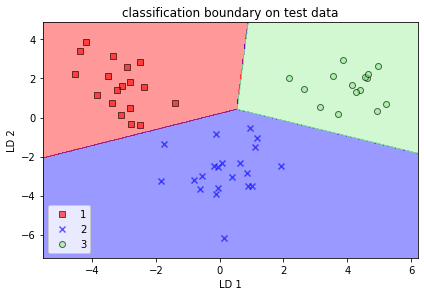

In [38]:
# For test data
Z_test_lda = lda.transform(X_test_std)

plot_decision_regions(Z_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('classification boundary on test data')
# plt.savefig('images/008.png', dpi=300)
plt.show()

-------------------------------------------

# Using kernel principal component analysis for nonlinear mappings

Firstly, we do kernel PCA with native Python for understanding.  After this, we will do this with scikit-learn.

In [39]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np


from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import exp
else:
    from scipy import exp




def rbf_kernel_pca(X, gamma, k_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    k_components: int
      Number of principal components to return

    Returns
    ------------
     scores: {NumPy ndarray}, shape = [n_examples, k_components]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    scores = np.column_stack([eigvecs[:, i]
                            for i in range(k_components)])

    return scores


### Example 1: Separating half-moon shapes

This cannot be separated with linear boundary.

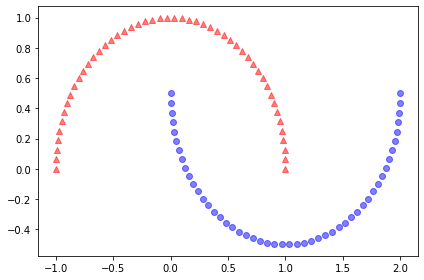

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('101.png', dpi=300)
plt.show()

In [41]:
# see the shape of moon data
print(X.shape, y.shape)
print(X[:10])
print(y[:10])

(100, 2) (100,)
[[ 0.8713  0.4907]
 [ 0.7155 -0.4587]
 [ 1.4625 -0.3866]
 [-0.2225  0.9749]
 [ 0.3277 -0.2403]
 [ 1.      0.    ]
 [ 0.9491  0.3151]
 [ 0.      0.5   ]
 [ 1.4048 -0.4144]
 [ 0.9673  0.2537]]
[0 1 1 0 1 0 0 1 1 0]


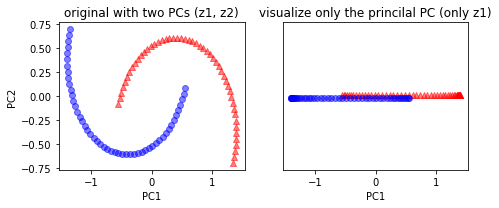

In [42]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
Z_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(Z_spca[y == 0, 0], Z_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(Z_spca[y == 1, 0], Z_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)
ax[0].set_title('original with two PCs (z1, z2)')

ax[1].scatter(Z_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(Z_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)
ax[1].set_title('visualize only the princilal PC (only z1)')

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('101pca.png', dpi=300)
plt.show()

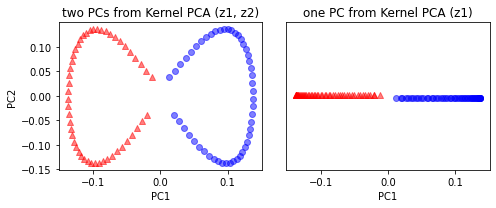

In [43]:
Z_kpca = rbf_kernel_pca(X, gamma=15, k_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(Z_kpca[y==0, 0], Z_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(Z_kpca[y==1, 0], Z_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
ax[0].set_title('two PCs from Kernel PCA (z1, z2)')

ax[1].scatter(Z_kpca[y==0, 0], np.zeros((50, 1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(Z_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)
ax[1].set_title('one PC from Kernel PCA (z1)')

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('101k_pca.png', dpi=300)
plt.show()

### Example 2: Separating concentric circles

This is also no linealy separatable.


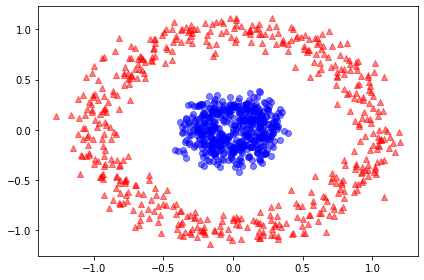

In [44]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('102.png', dpi=300)
plt.show()

using PCA  

cannot be separated.

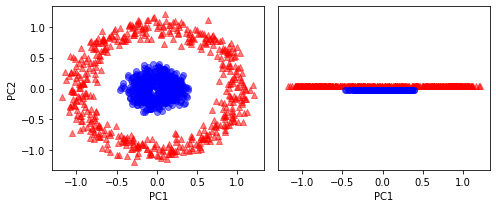

In [45]:
scikit_pca = PCA(n_components=2)
Z_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(Z_spca[y == 0, 0], Z_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(Z_spca[y == 1, 0], Z_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(Z_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(Z_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('103.png', dpi=300)
plt.show()

using Kernel PCA  

RBF Kernel  
$$
K(\boldsymbol{x},\boldsymbol{x'}) =\phi(\boldsymbol{x})^T\phi(\boldsymbol{x'}) = \exp(-\frac{||\boldsymbol{x}-\boldsymbol{x'}||^2}{\sigma^2}) =\exp (-\gamma ||\boldsymbol{x}-\boldsymbol{x'}||^2)
$$ 

, where $\gamma = 1/\sigma^2$ is a hyper parameter.


### separated!

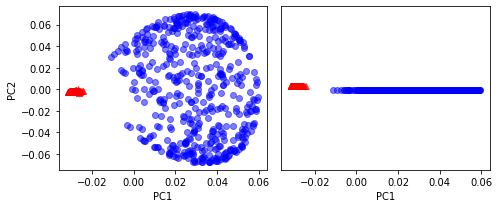

In [46]:
Z_kpca = rbf_kernel_pca(X, gamma=15, k_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(Z_kpca[y == 0, 0], Z_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(Z_kpca[y == 1, 0], Z_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(Z_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(Z_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('104.png', dpi=300)
plt.show()

Note: The RBF kernel theoretically provides an expansion to infinite dimensions.

## Projecting new data points  

This example illustrates mapping new (test) data using the mapping from moon data.

Generate new moon data and mapped to 1 dim.

Basically, the score $\boldsymbol{y'}$ of the new data $\boldsymbol{x'}$ can be expressed as 
$$
\boldsymbol{y_i} = \phi(\boldsymbol{x'})\boldsymbol{v_i}
$$
, where $v_i$ is eivenvector in high dimensional feature space of covariate matrix $\sum_{\phi(X)}$.  
However, in Kernel PCA, we do not know the function $\phi(x)$ because we avoided to calcluated this.

So we solve also this with Kernel trick.   
(See the slide for the derivation of the equation.

$$
\boldsymbol{y_i'} = \frac{1}{N-1}\sum_{n=1}^N a_i^{(n)} K(\boldsymbol{x'},\boldsymbol{x^{(n)}})
$$

So, we need to calculate Kernel $K(\boldsymbol{x'},\boldsymbol{x^{(n)}})$. This is the similarity between new test data $\boldsymbol{x'}$ and each of training data $\boldsymbol{x^{(n)}}$.

In [47]:
from scipy.spatial.distance import pdist, squareform
#from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca2(X, gamma, k_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    k_components: int
      Number of principal components to return

    Returns
    ------------
     alphas: {NumPy ndarray}, shape = [n_examples, k_components]
       Projected dataset 
     
     lambdas: list
       Eigenvalues

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(k_components)])

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(k_components)]

    return alphas, lambdas

In [48]:
X, y = make_moons(n_samples=100, random_state=1234)
alphas, lambdas = rbf_kernel_pca2(X, gamma=15, k_components=1)

In [49]:
# mapped to 1 dim (1st PC by kernel PCA) 
print(alphas[:10])

[[-0.0854]
 [-0.1132]
 [ 0.1283]
 [ 0.0939]
 [ 0.0269]
 [ 0.1264]
 [ 0.1132]
 [-0.1362]
 [-0.0916]
 [-0.0719]]


In [50]:
# only one lambda (mapped to 1dim)
print(lambdas)

[7.062724756679956]


In [51]:
# prepare one data and consider it as 'new' data
# (this is actually in the training data, this is in order to confirm the calculation is correct in the later.)
x_test = X[25]
x_test

# we know corresponding low dimensional representation (for confirmation)
y_test = alphas[25]
y_test

array([0.1372])

In [52]:
# calculate the score for x_test
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# projection of the "new" datapoint - confirm it is the same with the above
y_test_estimated = project_x(x_test, X, gamma=15, alphas=alphas, lambdas=lambdas)
y_test_estimated

array([0.1372])

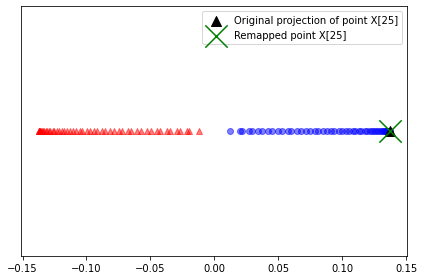

In [53]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(y_test, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(y_test_estimated, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('images/106.png', dpi=300)
plt.show()